## Guia da Camada Física
##### O documento tem o objetivo de demostrar o funcionamento da camada física, além de suas funções e ferramentas.

In [1]:
from quantumnet.components import Network, Host
from quantumnet.objects import Qubit, Logger
import random

##### Será definida a topologia de Grade na rede.

Hosts inicializados
Canais inicializados
Pares EPRs adicionados


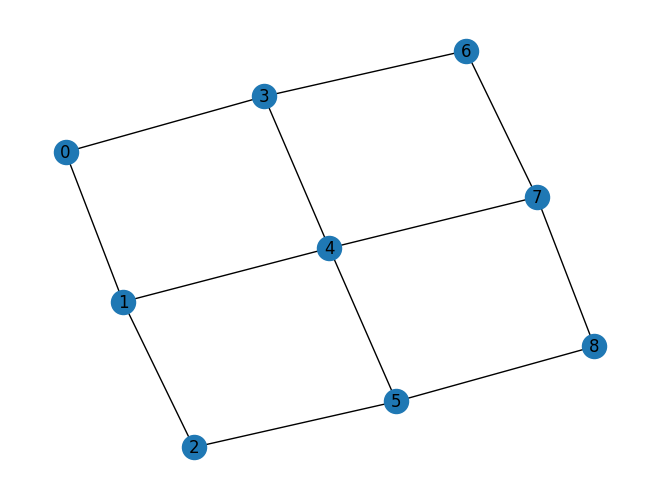

In [2]:
rede = Network()
rede.set_ready_topology("Grade", 3,3)
rede.draw()
Logger.activate(Logger)

##### Selecionando aleatoriamente uma aresta do grafo da rede e deseguinando quem será Alice e Bob.

In [3]:
arestas = list(rede.edges)
aresta_aleatorias = random.sample(arestas, 1)[0]
x,y = aresta_aleatorias

alice = rede.get_host(x)
bob = rede.get_host(y)

##### Adicionando qubits aos hosts.

In [4]:
h1 = Qubit(1)
h2 = Qubit(2)

alice.add_qubit(h1)
bob.add_qubit(h2)

2024-09-17 00:42:41,195: Qubit 1 adicionado à memória do Host 0.
2024-09-17 00:42:41,197: Qubit 2 adicionado à memória do Host 1.


##### Acessando a memória dos Hosts.

In [5]:
print(alice.memory)
print(bob.memory)

[<quantumnet.objects.qubit.Qubit object at 0x0000018E8ECCA090>, <quantumnet.objects.qubit.Qubit object at 0x0000018E8ECCA0D0>, <quantumnet.objects.qubit.Qubit object at 0x0000018E8ECCA110>, <quantumnet.objects.qubit.Qubit object at 0x0000018E8ECCA150>, <quantumnet.objects.qubit.Qubit object at 0x0000018E8ECCA190>, <quantumnet.objects.qubit.Qubit object at 0x0000018E8ECCA210>, <quantumnet.objects.qubit.Qubit object at 0x0000018E8ECCA250>, <quantumnet.objects.qubit.Qubit object at 0x0000018E8ECCA290>, <quantumnet.objects.qubit.Qubit object at 0x0000018E8ECCA2D0>, <quantumnet.objects.qubit.Qubit object at 0x0000018E8ECCA1D0>, <quantumnet.objects.qubit.Qubit object at 0x0000018E9DDC9850>]
[<quantumnet.objects.qubit.Qubit object at 0x0000018E8ECCA310>, <quantumnet.objects.qubit.Qubit object at 0x0000018E8ECCA350>, <quantumnet.objects.qubit.Qubit object at 0x0000018E8ECCA390>, <quantumnet.objects.qubit.Qubit object at 0x0000018E8ECCA3D0>, <quantumnet.objects.qubit.Qubit object at 0x0000018E8

##### Obtendo o útimo qubit de um dos hosts.

In [6]:
qub1 = alice.get_last_qubit()

##### Medindo a fidelidade entre dois qubits.


In [7]:
#Pode medir a fidelidade por meio dessa função
rede.physical.fidelity_measurement(h1,h2)

2024-09-17 00:42:41,250: A fidelidade do qubit Qubit 1 with state 0 é 0.9232708011510475
2024-09-17 00:42:41,252: A fidelidade do qubit Qubit 2 with state 0 é 0.5463789410184009
2024-09-17 00:42:41,255: A fidelidade entre o qubit 0.9232708011510475 e o qubit 0.5463789410184009 é 0.5044557226061199


0.5044557226061199

##### Medindo a fidelidade de um qubit.


In [8]:
#Pode se medir a fidelidade e acessar de somente um host
rede.physical.fidelity_measurement_only_one(h1)

2024-09-17 00:42:41,273: A fidelidade do qubit Qubit 1 with state 0 é 0.9232708011510475


0.9232708011510475

##### Protocolo de criação de entrelaçamento entre dois qubits.

In [9]:
rede.physical.entanglement_creation_heralding_protocol(alice,bob)

2024-09-17 00:42:41,293: Timeslot 1: Par epr criado com fidelidade 0.44242918766576184
2024-09-17 00:42:41,295: Timeslot 2: O protocolo de criação de emaranhamento foi bem sucedido, mas com fidelidade baixa.


False

##### Reavaliando a fidelidade de um qubit para comparar suas variações após a passagem de um timeslot.


In [10]:
#Pode se medir a fidelidade e acessar de somente um host
rede.physical.fidelity_measurement_only_one(h1)


2024-09-17 00:42:41,318: A fidelidade do qubit Qubit 1 with state 0 é 0.9140380931395371


0.9140380931395371

##### Realiza-se o primeiro protocolo, on demand, que através da fidelidade inicial e da probabilidade de sucesso do on demand determina o sucesso do ECHP.

In [11]:
rede.physical.echp_on_demand(2,5)

2024-09-17 00:42:41,341: A fidelidade do qubit Qubit 29 with state 0 é 0.6114927782397923
2024-09-17 00:42:41,342: A fidelidade do qubit Qubit 59 with state 0 é 0.21210339030375075
2024-09-17 00:42:41,343: Timeslot 3: A probabilidade de sucesso do ECHP falhou.


False

##### Realiza-se, então, o segundo protocolo, on replay, que através da fidelidade inicial e da probabilidade de sucesso do on replay determina o sucesso do ECHP.

In [12]:
rede.physical.echp_on_replay(2,5)

2024-09-17 00:42:41,362: A fidelidade do qubit Qubit 28 with state 0 é 0.0932776610738259
2024-09-17 00:42:41,365: A fidelidade do qubit Qubit 58 with state 0 é 0.026233042830223395
2024-09-17 00:42:41,366: Timeslot 4: A probabilidade de sucesso do ECHP falhou.


False

##### A função get_total_useds_qubits, será usada para mostrar quantos qubits foram usados na camada Física.

In [13]:
rede.get_total_useds_qubits()

2024-09-17 00:42:41,393: Qubits usados na camada PhysicalLayer: 6
2024-09-17 00:42:41,396: Qubits usados na camada LinkLayer: 0
2024-09-17 00:42:41,397: Qubits usados na camada TransportLayer: 0
2024-09-17 00:42:41,398: Qubits usados na camada ApplicationLayer: 0


6

##### Nesta função, get_total_used_erps, será calculado a quantidade de pares EPRs usados na camada Física.

In [14]:
rede.get_total_useds_eprs()

2024-09-17 00:42:41,414: Eprs usados na camada PhysicalLayer: 1
2024-09-17 00:42:41,415: Eprs usados na camada LinkLayer: 0
2024-09-17 00:42:41,416: Eprs usados na camada NetworkLayer: 0


1

##### Acessando o canal que mostra as probablidades e os pares eprs.


In [15]:
rede.edges[2,5]

{'prob_on_demand_epr_create': 0.49389021977360176,
 'prob_replay_epr_create': 0.9286586463911786,
 'eprs': [<quantumnet.objects.epr.Epr at 0x18e8ecd15d0>,
  <quantumnet.objects.epr.Epr at 0x18e8ecd1710>]}

##### Acessando o dicionario que contém os pares eprs alocados.


In [16]:
rede.get_eprs()

{(0, 3): [<quantumnet.objects.epr.Epr at 0x18e8ecd0b10>,
 (0, 1): [<quantumnet.objects.epr.Epr at 0x18e8ecd0d90>,
 (1, 4): [<quantumnet.objects.epr.Epr at 0x18e8ecd1050>,
 (1, 2): [<quantumnet.objects.epr.Epr at 0x18e8ecd1310>,
 (2, 5): [<quantumnet.objects.epr.Epr at 0x18e8ecd15d0>,
 (3, 6): [<quantumnet.objects.epr.Epr at 0x18e8ecd1890>,
 (3, 4): [<quantumnet.objects.epr.Epr at 0x18e8ecd1b10>,
 (4, 7): [<quantumnet.objects.epr.Epr at 0x18e8ecd1dd0>,
 (4, 5): [<quantumnet.objects.epr.Epr at 0x18e8ecd2050>,
 (5, 8): [<quantumnet.objects.epr.Epr at 0x18e8ecd2310>,
 (6, 7): [<quantumnet.objects.epr.Epr at 0x18e8ecd25d0>,
 (7, 8): [<quantumnet.objects.epr.Epr at 0x18e8ecd2890>,
  <quantumnet.objects.epr.Epr at 0x18e8ecd29d0>]}

##### A função get_timeslot apresenta quantos timeslot se passaram durante a execução da camada.

In [17]:
rede.get_timeslot()

4

In [18]:
rede.display_all_qubit_timeslots()

Qubit 0 foi criado no timeslot 0
Qubit 1 foi criado no timeslot 0
Qubit 2 foi criado no timeslot 0
Qubit 3 foi criado no timeslot 0
Qubit 4 foi criado no timeslot 0
Qubit 5 foi criado no timeslot 0
Qubit 6 foi criado no timeslot 0
Qubit 7 foi criado no timeslot 0
Qubit 8 foi criado no timeslot 0
Qubit 9 foi criado no timeslot 0
Qubit 10 foi criado no timeslot 0
Qubit 11 foi criado no timeslot 0
Qubit 12 foi criado no timeslot 0
Qubit 13 foi criado no timeslot 0
Qubit 14 foi criado no timeslot 0
Qubit 15 foi criado no timeslot 0
Qubit 16 foi criado no timeslot 0
Qubit 17 foi criado no timeslot 0
Qubit 18 foi criado no timeslot 0
Qubit 19 foi criado no timeslot 0
Qubit 20 foi criado no timeslot 0
Qubit 21 foi criado no timeslot 0
Qubit 22 foi criado no timeslot 0
Qubit 23 foi criado no timeslot 0
Qubit 24 foi criado no timeslot 0
Qubit 25 foi criado no timeslot 0
Qubit 26 foi criado no timeslot 0
Qubit 27 foi criado no timeslot 0
Qubit 28 foi criado no timeslot 0
Qubit 29 foi criado no t